In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


df = pd.read_csv("/content/drive/MyDrive/Datasets/Cleaned_Algerian_forest_fires_dataset.csv")
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


###  **Some data cleaning was done in another notebook**

---



In [3]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0','day', 'month', 'year'], axis = 1, inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
### Label encoding

df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0,1)

In [8]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
X = df.drop("FWI", axis = 1)
y = df["FWI"]

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [11]:
print(X_train.shape)
print(y_train.shape)

(182, 11)
(182,)


### **Feature Selection( Based on Correlation )**

---



In [12]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.652816,-0.322573,-0.255504,0.637641,0.516246,0.366384,0.617708,0.474333,0.502069,0.268140
RH,-0.652816,1.000000,0.227066,0.218405,-0.660510,-0.378993,-0.165336,-0.702532,-0.308752,-0.414526,-0.419991
Ws,-0.322573,0.227066,1.000000,0.181821,-0.167283,0.011199,0.107890,-0.009814,0.051933,-0.039811,-0.118917
Rain,-0.255504,0.218405,0.181821,1.000000,-0.476974,-0.259029,-0.277561,-0.306998,-0.272533,-0.352028,-0.027354
FFMC,0.637641,-0.660510,-0.167283,-0.476974,1.000000,0.623634,0.515786,0.735366,0.609221,0.764535,0.179543
DMC,0.516246,-0.378993,0.011199,-0.259029,0.623634,1.000000,0.864094,0.659011,0.978894,0.626014,0.176180
DC,0.366384,-0.165336,0.107890,-0.277561,0.515786,0.864094,1.000000,0.454007,0.935533,0.553329,-0.103570
ISI,0.617708,-0.702532,-0.009814,-0.306998,0.735366,0.659011,0.454007,1.000000,0.611684,0.734636,0.272793
BUI,0.474333,-0.308752,0.051933,-0.272533,0.609221,0.978894,0.935533,0.611684,1.000000,0.632120,0.064320
Classes,0.502069,-0.414526,-0.039811,-0.352028,0.764535,0.626014,0.553329,0.734636,0.632120,1.000000,0.101958


<Axes: >

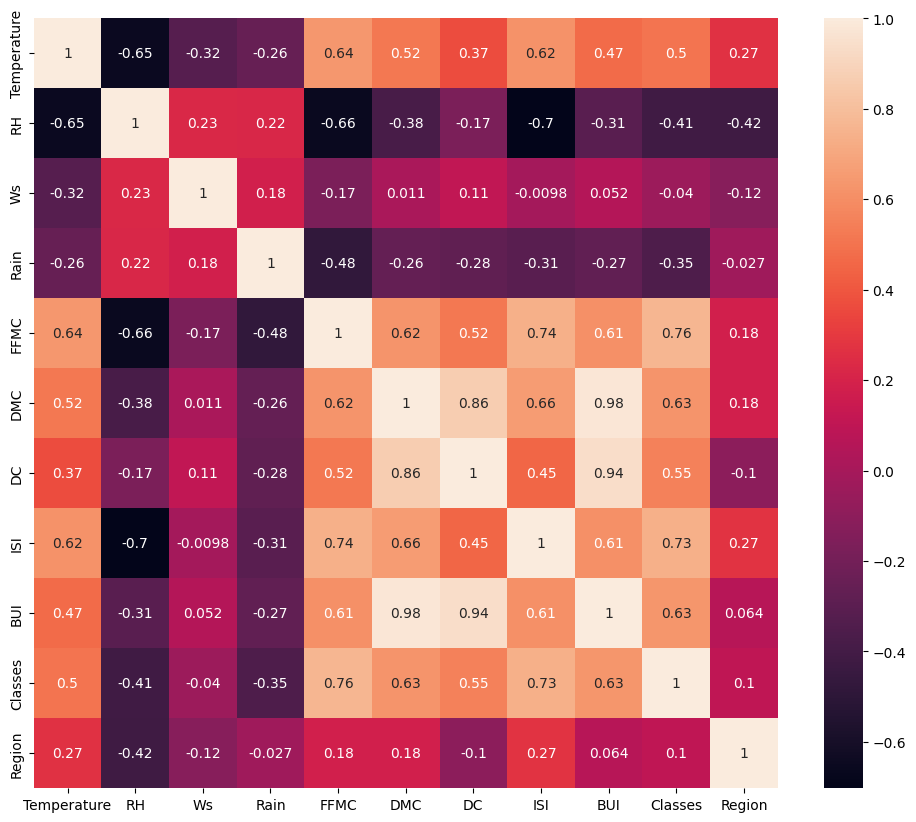

In [13]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [14]:
### defining a Correlation Threshold

def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [15]:
corr_features = correlation(X_train,threshold=0.85)

In [16]:
X_train.drop(corr_features, inplace = True, axis = 1)
X_test.drop(corr_features, inplace = True, axis = 1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-18-0b884ed7246c>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'After Scaling')

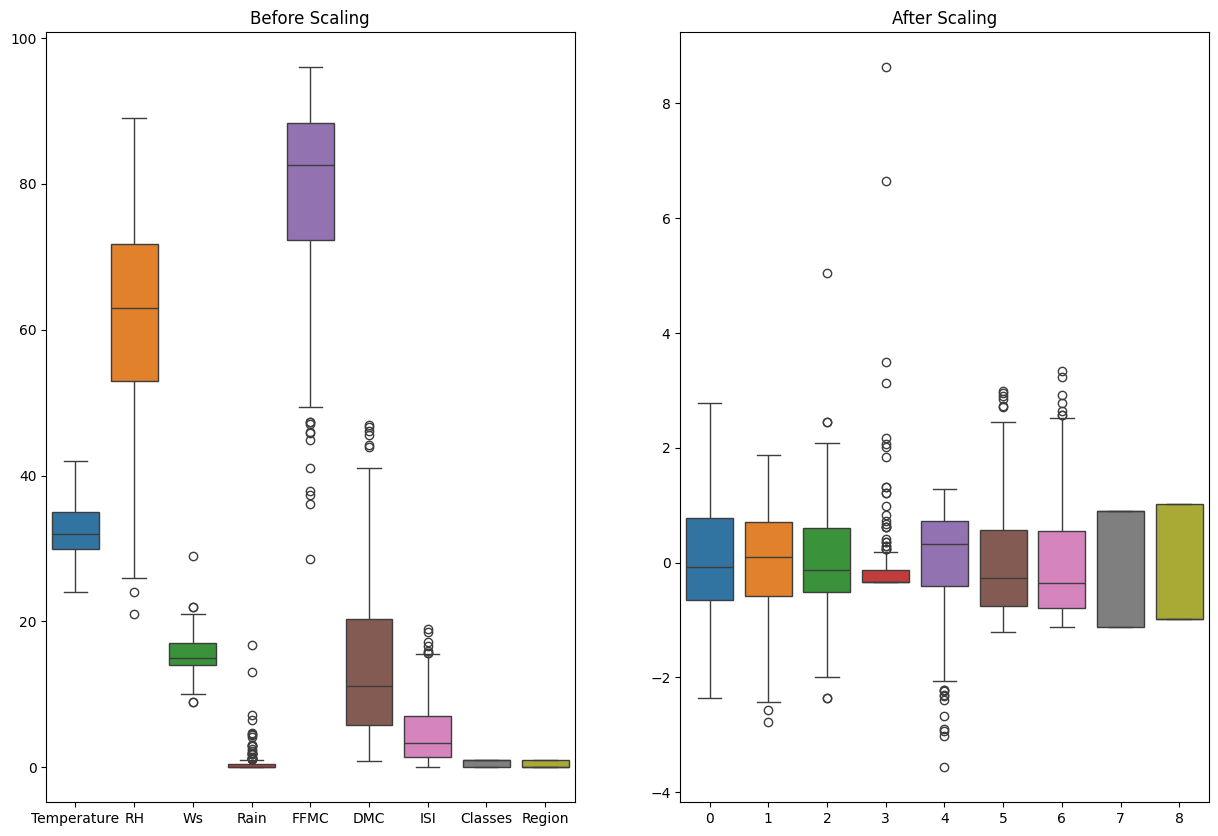

In [18]:
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("After Scaling")

### **Linear Regression**

---



In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
y_pred = lin_reg_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  0.7201969320652097
R2 Score:  0.9843245935615206


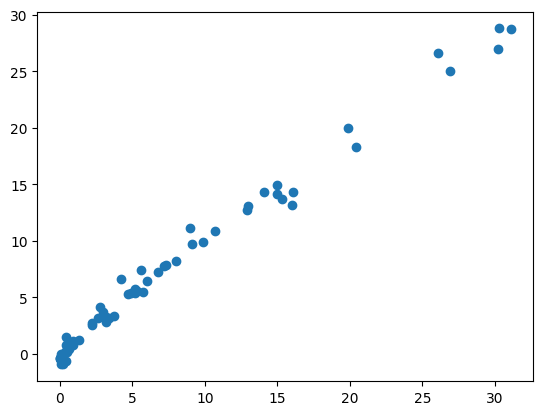

In [21]:
plt.scatter(y_test, y_pred)


### **Lasso regression**

---



In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso_reg_model = Lasso()

lasso_reg_model.fit(X_train_scaled,y_train)

Lasso()

In [23]:
y_pred = lasso_reg_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(mae)
print(score)

1.4261592778459775
0.9376751630507032


### **Ridge Regression**

---



In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge_reg_model = Ridge()
ridge_reg_model.fit(X_train_scaled,y_train)

Ridge()

In [26]:
y_pred = ridge_reg_model.predict(X_test_scaled)

mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae)
print(score)

0.751200245099473
0.9834235734495221


In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic_reg_model = ElasticNet()
elastic_reg_model.fit(X_train_scaled,y_train)

ElasticNet()

In [28]:
y_pred = elastic_reg_model.predict(X_test_scaled)

mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae)
print(score)

2.226977279679075
0.8584469484578701
